### PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KimDongyoung\AppData\Local\Programs\P

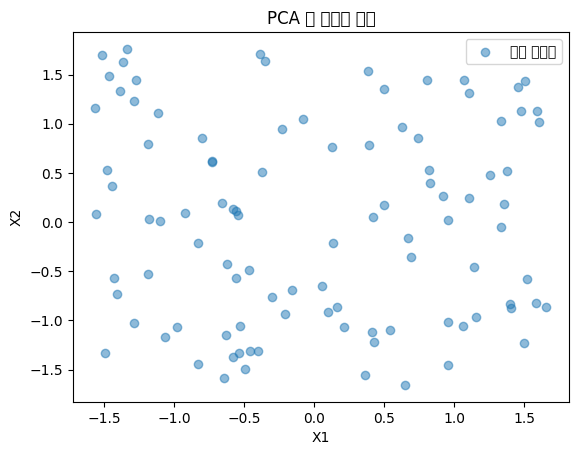

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KimDongyoung\AppData\Local\Program

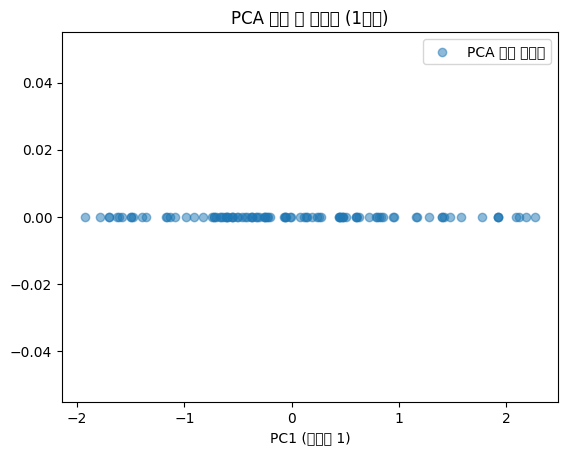

In [2]:
# 샘플 데이터 생성 (2차원)
np.random.seed(42)
X = np.random.rand(100, 2)  # 100개의 샘플, 2개의 변수

# 데이터 표준화 (평균 0, 분산 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용 (1차원으로 축소)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# 원본 데이터 시각화
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], label="원본 데이터", alpha=0.5)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("PCA 전 데이터 분포")
plt.legend()
plt.show()

# PCA 변환 후 데이터 시각화
plt.scatter(X_pca, np.zeros_like(X_pca), label="PCA 변환 데이터", alpha=0.5)
plt.xlabel("PC1 (주성분 1)")
plt.title("PCA 변환 후 데이터 (1차원)")
plt.legend()
plt.show()

### CFA

In [4]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import pandas as pd

In [5]:
# 샘플 데이터 생성
data = pd.DataFrame({
    "디자인": [5, 4, 3, 5, 4, 5, 3, 4, 3, 5],
    "성능": [4, 3, 5, 3, 4, 5, 2, 4, 5, 3],
    "사용편의성": [5, 3, 4, 5, 3, 4, 3, 5, 4, 5],
    "배터리": [4, 3, 3, 4, 5, 3, 4, 4, 5, 3],
    "가격": [3, 4, 5, 3, 4, 5, 4, 3, 4, 5],
})

# 바틀렛 테스트
bartlett_stat, bartlett_p = calculate_bartlett_sphericity(data)
print(f"바틀렛 테스트 p-value: {bartlett_p}")

# KMO 검정
kmo_all, kmo_model = calculate_kmo(data)
print(f"KMO 검정값: {kmo_model}")

바틀렛 테스트 p-value: 0.548699161948325
KMO 검정값: 0.37670850735057343


### 다중공선성 해결과 섀플리 밸류 분석

VIF 값이 높을수록 다른 변수들과 높은 상관관계를 가진다는 뜻이다.

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# 샘플 데이터 생성
data = pd.DataFrame({
    "변수1": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "변수2": [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    "변수3": [5, 4, 6, 5, 7, 8, 9, 10, 12, 11]
})

# VIF 계산 함수
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

# VIF 값 계산
vif_result = calculate_vif(data)
print(vif_result)

  Feature        VIF
0     변수1        inf
1     변수2        inf
2     변수3  26.901163


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


다중공선성 해결 방법    

상관계수 분석 -> 0.7 이상이면 다중공선성 의심   
VIF 계산 -> 5이상이면 제거 고려, 10 이상이면 심각   
변수 변환 -> 로그 변환, 표준화    
차원 축소(PCA) -> 변수 축소   
모델 기반 변수 선택 -> 전진 선택법, 후진 제거법 활용    

### Z-test, T-test

Z-test와 T-test는 두 집단 간 평균 차이가 통계적으로 유의미한지 판단하는 기본적인 통계 검정 방법

In [18]:
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats
from scipy import stats
from scipy.stats import ttest_ind

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sewonghwang/golf-ball-testing")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\KimDongyoung\.cache\kagglehub\datasets\sewonghwang\golf-ball-testing\versions\1


In [10]:
import os
import pandas as pd

# path 경로 내 파일 목록 확인
files = os.listdir(path)
print("폴더 내 파일 목록:", files)

# 예시: 첫 번째 csv 파일을 불러오기
csv_files = [f for f in files if f.endswith('.csv')]
if csv_files:
  df = pd.read_csv(os.path.join(path, csv_files[0]))
  print(df.head())
else:
  print("csv 파일이 없습니다.")

폴더 내 파일 목록: ['Golf_test.csv']
   TypeA_before  TypeA_after  TypeB_before  TypeB_after  TypeC_before  \
0           277          264           265          268           267   
1           269          261           264          267           264   
2           263          267           269          272           283   
3           266          272           274          277           287   
4           262          258           261          264           275   

   TypeC_after  
0          268  
1          269  
2          283  
3          266  
4          266  


In [11]:
df

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266
5,251,283,286,289,278,278
6,262,258,260,263,273,264
7,289,266,269,272,267,285
8,286,259,262,265,262,265
9,264,270,272,275,272,257


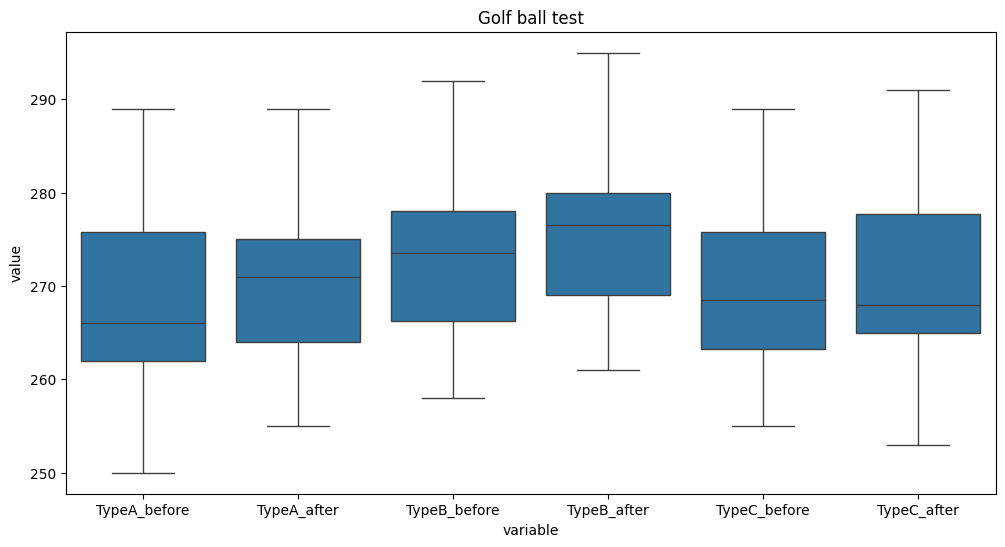

In [13]:
# 그룹 별 박스 플롯 시각화
import seaborn as sns

df2 =  pd.melt(df)
plt.figure(figsize=(12,6))
sns.boxplot(x='variable', y='value', data=df2)
plt.title('Golf ball test')
plt.show()

In [16]:
# 데이터 정규성 검정
from scipy.stats import shapiro

print(shapiro(df['TypeA_before']))
print(shapiro(df['TypeA_after']))
print(shapiro(df['TypeB_before']))
print(shapiro(df['TypeB_after']))
print(shapiro(df['TypeC_before']))
print(shapiro(df['TypeC_after']))

ShapiroResult(statistic=0.9655377864837646, pvalue=0.15155059099197388)
ShapiroResult(statistic=0.9728279113769531, pvalue=0.3005082309246063)
ShapiroResult(statistic=0.9730042219161987, pvalue=0.30535760521888733)
ShapiroResult(statistic=0.9693011045455933, pvalue=0.21675525605678558)
ShapiroResult(statistic=0.9595518112182617, pvalue=0.08513058722019196)
ShapiroResult(statistic=0.9469832181930542, pvalue=0.02568192593753338)


In [19]:
# 데이터 등분산성 검정
stats.bartlett(df['TypeA_before'],df['TypeA_after'],
               df['TypeB_before'],df['TypeB_after'],
               df['TypeC_before'],df['TypeC_after'])

BartlettResult(statistic=2.232358764161634, pvalue=0.8161484218330712)

In [20]:
# Z-test (TypeA_Before와 TypeA_After)
ztest(df['TypeA_before'], x2=df['TypeA_after'], value=0, alternative='two-sided')

(-1.2313987682249838, 0.21817375744980994)

In [21]:
# Z-test (TypeA_Before와 TypeB_before)

# 양측검정
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='two-sided'))

# 단측검정(왼꼬리검정)
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='smaller'))

# 단측검정(오른꼬리검정)
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='larger'))

(-2.789495974658115, 0.005279015267745853)
(-2.789495974658115, 0.0026395076338729265)
(-2.789495974658115, 0.9973604923661271)


In [22]:
# 대응표본 t검정 수행
scipy.stats.ttest_rel(df['TypeA_before'],df['TypeA_after'])

TtestResult(statistic=-1.221439914972903, pvalue=0.22776376448687602, df=49)

In [23]:
# 독립표본 t검정 수행
ttest_ind(df['TypeA_before'],df['TypeB_before'], equal_var=False)

TtestResult(statistic=-2.789495974658115, pvalue=0.0063642243501398285, df=96.23536968302767)

### ANOVA

세 개 이상의 집단 평균 차이가 통계적으로 유의미한지 검정하는 방법   
F-분포를 이용하여 집단 간 차이를 검정한다   
독립변수가 범주형이며, 종속변수는 연속형인 경우에 사용한다    

ANOVA의 가설검정    
  - 귀무가설: 모든 집단의 평균이 동일하다, 독립변수의 차이에 따른 종속변수는 동일하다      
  - 대립가설: 적어도 하나의 집단 평균이 다르다, 독립변수의 차이에 따른 종속변수는 다르다      

In [25]:
# stats 패키지 아노바 검정

F_statistic, pVal = stats.f_oneway(df['TypeA_before'],
                                   df['TypeB_before'],
                                   df['TypeC_before'])

print('다원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))

다원분산분석 결과 : F=4.2, p=0.01652


### 카이제곱 검정

범주형 변수간의 연관성을 분석하는 통계적 방법   
두 변수의 조합을 교차표로 만든 후, 빈도와 비율을 비교하여 상관성을 판단   
연속형 변수는 직접 사용할 수 없으며, 범주형 변수로 변환하여 사용해야 한다.    
카이제곱 검정에서는 귀무가설을 설정하여, 변수 간의 독립성을 검정하며 카이제곱 값을 통해 연관성을 판단한다.    